In [1]:
import pandas as pd
import numpy as np
import os

In [2]:
parent_dir="/home/pranay5255/Desktop/Price_action_data_hourly/"
paFolder_files=os.listdir(parent_dir)

In [3]:
paFolder_files

['2022', '2019', '2018', '2021', '2020', '2023']

In [4]:
def TickerWiseDataFetch_PandasTransform(ticker,timeframe):
    main_df=pd.DataFrame()

    yearly_dict={}
    parent_dir="/home/pranay5255/Desktop/Price_action_data_hourly/"
    paFolder_files=os.listdir(parent_dir)
    for folder in paFolder_files:
        yearly_dir=os.path.join(parent_dir,folder)
        _files=os.listdir(yearly_dir)
        for file in _files:
            # print(file)
            if ticker in file and timeframe in file:
                yearly_dict[folder]=pd.read_csv(os.path.join(yearly_dir,file),index_col=[0]).reset_index()



    
    for year in yearly_dict:
        main_df=pd.concat([main_df,yearly_dict[year]],ignore_index=True)
        main_df.sort_values(by='timestamp',inplace=True)
        print(year)
    

    return(main_df)

In [6]:
BTC_data=TickerWiseDataFetch_PandasTransform(ticker='BTC',timeframe='1h')
ETH_data=TickerWiseDataFetch_PandasTransform(ticker='ETH',timeframe='1h')
AAVE_data=TickerWiseDataFetch_PandasTransform(ticker='AAVE',timeframe='1h')
ATOM_data=TickerWiseDataFetch_PandasTransform(ticker='ATOM',timeframe='1h')

2022
2019
2018
2021
2020
2023
2022
2019
2018
2021
2020
2023
2022
2021
2023
2022
2021
2023


In [7]:
price_data={"BTC": BTC_data['close'].pct_change(),
"ETH": ETH_data['close'].pct_change(),
"AAVE": AAVE_data['close'].pct_change(),
"ATOM": ATOM_data['close'].pct_change()}

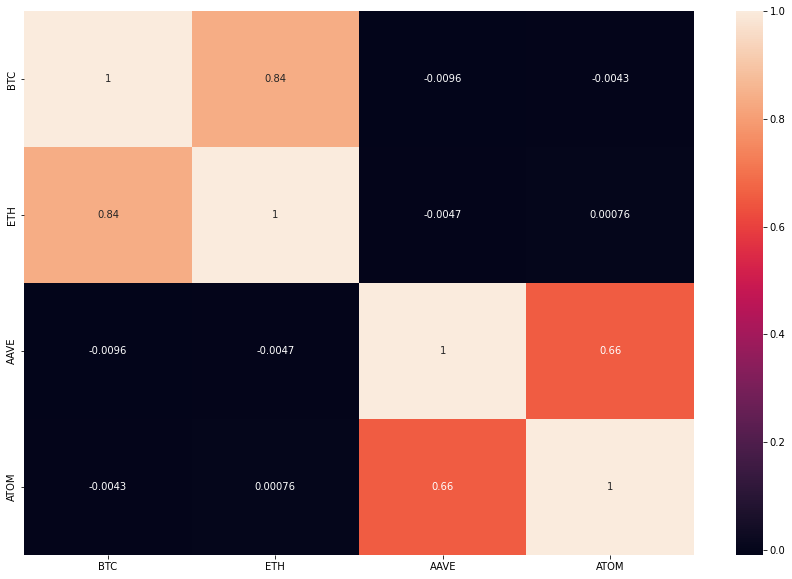

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def create_correlation_heatmap(price_data):
    df = pd.DataFrame(price_data)
    correlation_matrix = df.corr()
    plt.figure(figsize=(15,10))
    sns.heatmap(correlation_matrix, annot=True)
    
    plt.show()


create_correlation_heatmap(price_data=price_data)

In [16]:
BTC_data_test=BTC_data[BTC_data['timestamp'] >'2023-01-01 00:00:00']

In [24]:

BTC_data_test['close']

43794    16551.47
43795    16548.19
43796    16533.04
43797    16521.85
43798    16530.71
           ...   
46356    29358.31
46357    29464.43
46358    29462.67
46359    29495.28
46360    29495.29
Name: close, Length: 2567, dtype: float64

2566 8.26434918199403 1057.8366952952358
[[ 0.53971014  0.52196745  0.48862108 ...  0.34036523  0.35971745
   0.36830316]
 [ 0.56943231  0.55278041  0.52128545 ...  0.36039898  0.37841896
   0.38635825]
 [ 0.60196423  0.58647872  0.55688541 ...  0.38084717  0.39728836
   0.40439173]
 ...
 [73.72042877 73.75945406 73.79815378 ... 20.76485685 20.71616365
  20.66742367]
 [74.25419599 74.28615332 74.31782547 ... 24.98315573 24.93007026
  24.87694539]
 [93.76878878 93.79264227 93.81627931 ... 46.39844463 46.36155573
  46.32465166]]


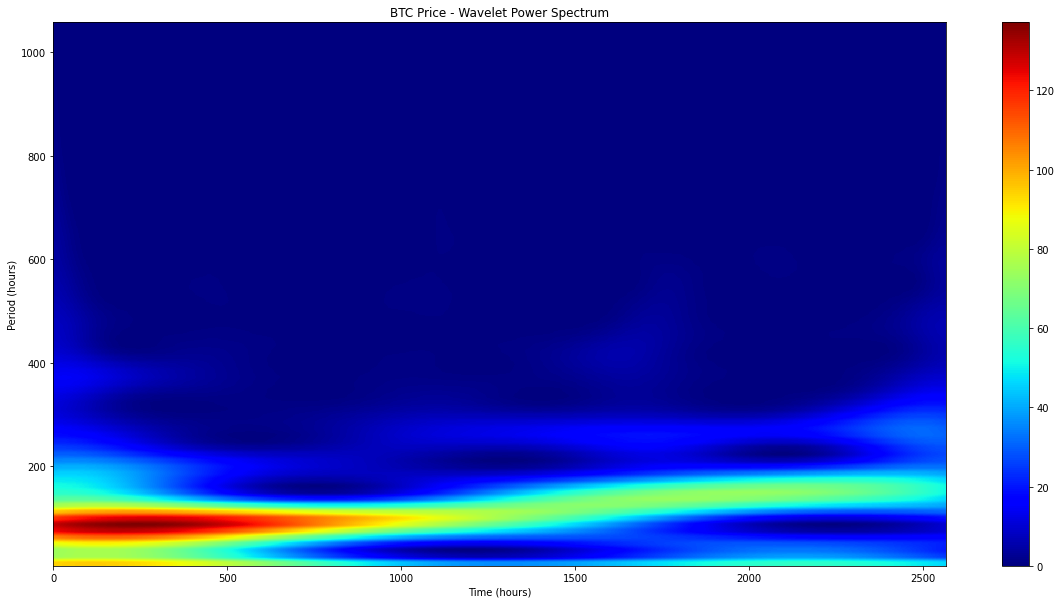

In [35]:


import numpy as np
import matplotlib.pyplot as plt
import pycwt as wavelet

# Prepare the data
# We will use the closing price for our analysis
price = BTC_data_test['close'].values
time = np.arange(len(price))

# We will assume that we have one observation per day
dt = 1.0

# We subtract the mean and divide by the standard deviation to normalize the data
std = price.std()  
mean = price.mean()
price = (price - mean) / std

# The following parameters are defined for the wavelet analysis
mother = wavelet.Morlet(6)  # Morlet mother wavelet with m=6
s0 = 8 * dt  # Starting scale, in this case 2 days
dj = 1 / 12  # Twelve sub-octaves per octaves
J = 7 / dj  # Seven powers of two with dj sub-octaves
alpha = 0.3  # Lag-1 autocorrelation for white noise

# Perform the wavelet transform
wave, scales, freqs, coi, fft, fftfreqs = wavelet.cwt(price, dt, dj, s0, J, mother)
power = (np.abs(wave)) ** 2
fft_power = np.abs(fft) ** 2
period = 1 / freqs

print(max(time), min(period), max(period))
print(power)
# Plot the results
plt.figure(figsize=(20, 10))
plt.imshow(power, extent=[0, max(time), min(period), max(period)], aspect='auto', cmap='jet')
plt.colorbar()
plt.title('BTC Price - Wavelet Power Spectrum')
plt.xlabel('Time (hours)')
plt.ylabel('Period (hours)')
plt.show()


In [6]:
import numpy as np
x=10783536690092973843715749
exponent_gwei=1e-17

In [27]:
power.shape

(85, 2567)

In [7]:
np.power(x,exponent_gwei)

1.0000000000000007

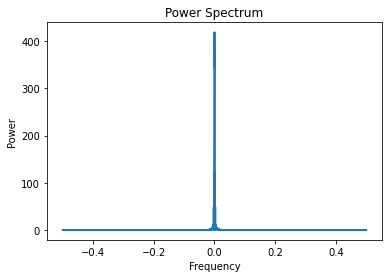

In [37]:
import numpy as np
import matplotlib.pyplot as plt

# Assume you have a time series data
data = BTC_data_test['close']

# Detrend and normalize data
mean = np.mean(data)
std = np.std(data)
data = (data - mean) / std

# Apply FFT
fft_result = np.fft.fft(data)

# Calculate power spectrum
power_spectrum = np.abs(fft_result)**2 / len(data)

# Get the frequencies
frequencies = np.fft.fftfreq(len(data))

# Plot the power spectrum
plt.plot(frequencies, power_spectrum)
plt.xlabel('Frequency')
plt.ylabel('Power')
plt.title('Power Spectrum')
plt.show()



In [13]:
import json

with open('../Desktop/maker_dao_abi.json', 'r') as f:
    your_contract_abi = json.load(f)

# Access and use the abi variable in your code
print(abi.result)  # Print the contract ABI
# ... Other code using the contract ABI


AttributeError: 'dict' object has no attribute 'result'

In [14]:
abi['result']

'[{"constant":true,"inputs":[],"name":"name","outputs":[{"name":"","type":"bytes32"}],"payable":false,"stateMutability":"view","type":"function"},{"constant":false,"inputs":[],"name":"stop","outputs":[],"payable":false,"stateMutability":"nonpayable","type":"function"},{"constant":false,"inputs":[{"name":"guy","type":"address"},{"name":"wad","type":"uint256"}],"name":"approve","outputs":[{"name":"","type":"bool"}],"payable":false,"stateMutability":"nonpayable","type":"function"},{"constant":false,"inputs":[{"name":"owner_","type":"address"}],"name":"setOwner","outputs":[],"payable":false,"stateMutability":"nonpayable","type":"function"},{"constant":true,"inputs":[],"name":"totalSupply","outputs":[{"name":"","type":"uint256"}],"payable":false,"stateMutability":"view","type":"function"},{"constant":false,"inputs":[{"name":"src","type":"address"},{"name":"dst","type":"address"},{"name":"wad","type":"uint256"}],"name":"transferFrom","outputs":[{"name":"","type":"bool"}],"payable":false,"sta

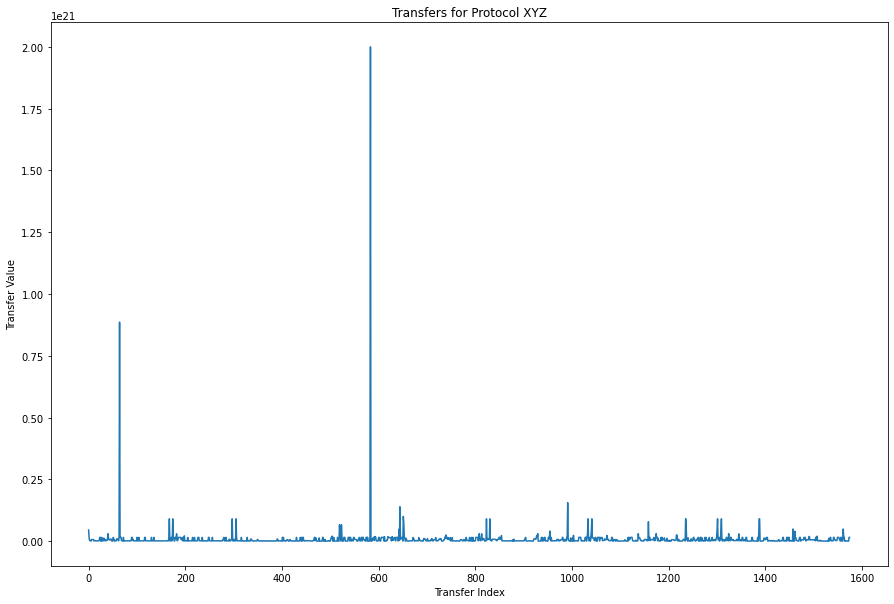

In [18]:
import web3
import matplotlib.pyplot as plt

# Initialize Web3 provider
web3_provider = web3.Web3(web3.HTTPProvider('https://mainnet.infura.io/v3/8cfed8aad74b48f68c7a82bef639ec4d'))

# Define protocol contract address
protocol_contract_address = '0x9f8F72aA9304c8B593d555F12eF6589cC3A579A2'  
# Replace with the actual contract address

# Define start and end blocks for data retrieval
start_block = 10000000
end_block = 10010000

# Retrieve blockchain data
contract = web3_provider.eth.contract(address=protocol_contract_address, abi=your_contract_abi['result'])
transfer_events = contract.events.Transfer.getLogs(fromBlock=start_block, toBlock=end_block)

# Process and filter transfer events
transfers = []
for event in transfer_events:
    # Extract relevant information from the event
    transfer_data = {
        'from': event['args']['from'],
        'to': event['args']['to'],
        'value': event['args']['value'],
    }
    transfers.append(transfer_data)

# Plot transfer data
x = range(len(transfers))
y = [transfer['value'] for transfer in transfers]

plt.figure(figsize=(15,10))
plt.plot(x, y)

plt.xlabel('Transfer Index')
plt.ylabel('Transfer Value')
plt.title('Transfers for Protocol XYZ')
plt.show()


In [19]:
import requests

# Function to convert a timestamp to block number using Infura
def timestamp_to_block_number(timestamp):
    # Infura API endpoint
    endpoint = "https://mainnet.infura.io/v3/8cfed8aad74b48f68c7a82bef639ec4d"

    # Request block number from Infura
    payload = {
        "jsonrpc": "2.0",
        "method": "eth_blockNumber",
        "params": [],
        "id": 1
    }
    response = requests.post(endpoint, json=payload).json()

    if "result" in response:
        latest_block_number = int(response["result"], 16)

        # Infura block time is approximately 13 seconds
        block_time_interval = 13

        # Calculate the target block number based on the timestamp
        target_block_number = latest_block_number - (timestamp // block_time_interval)
        return target_block_number
    else:
        print("Error: Unable to retrieve block number from Infura")
        return None

# Example usage
timestamp = 1622772000  # Example timestamp (June 4, 2021, 12:00:00 in Unix timestamp format)
block_number = timestamp_to_block_number(timestamp)

if block_number is not None:
    print("Block number:", block_number)


Block number: -107420112


In [ ]:
main_df['close'].diff(lag)

0            NaN
1            NaN
2            NaN
3         323.62
4         391.57
           ...  
185389     -3.51
185390     17.33
185391    -32.57
185392    -40.77
185393    -74.61
Name: close, Length: 185394, dtype: float64

In [14]:
import pandas as pd
import requests

# Define the API endpoint URL
def get_all_protocols_onDefilllama():
    api_url = "https://api.llama.fi/protocols"

    # Send a GET request to the API endpoint
    response = requests.get(api_url)

    # Check if the request was successful
    if response.status_code == 200:
        # Extract the data from the response
        data = response.json()

        # Create a DataFrame from the data
        df = pd.DataFrame(data)
    else:
        print("Error: Unable to fetch data from the API")
    return(df)

def get_protocol_TVLbyname(protocol_name="uniswap"):
    api_url = "https://api.llama.fi/tvl/"+protocol_name
    # print(api_url)

    # Send a GET request to the API endpoint
    response = requests.get(api_url)

    # Check if the request was successful
    if response.status_code == 200:
        # Extract the data from the response
        data = response.json()
        # print(data)
        # Create a DataFrame from the data
        # df = pd.DataFrame(data)
    else:
        print("Error: Unable to fetch data from the API")
    return("TVL is {}".format(data))


    
    

In [18]:
get_protocol_TVLbyname(protocol_name='aave')


'TVL is 5431676257.576322'

In [17]:
get_protocol_TVLbyname(protocol_name='uniswap')

'TVL is 4116348790.390712'

In [5]:
api_url = "https://api.llama.fi/tvl/"+"uniswap"
print(api_url)

# Send a GET request to the API endpoint
response = requests.get(api_url)

# Check if the request was successful
if response.status_code == 200:
    # Extract the data from the response
    data = response.json()
    print(data)
    # Create a DataFrame from the data
    # df = pd.DataFrame(data)
else:
    print("Error: Unable to fetch data from the API")

return("TVL is {}".format(data))


https://api.llama.fi/tvl/uniswap
4116348790.390712


In [ ]:
df

,id,name,address,symbol,url,description,chain,logo,audits,audit_note,...,mcap,stablecoins,language,parentProtocol,staking,wrongLiquidity,pool2,assetToken,oraclesByChain,github
0,2269,Binance CEX,None,-,https://www.binance.com,Binance is a cryptocurrency exchange which is ...,Multi-Chain,https://icons.llama.fi/binance-cex.jpg,0,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,182,Lido,0x5a98fcbea516cf06857215779fd812ca3bef1b32,LDO,https://lido.fi/,"Liquidity for staked assets. Daily rewards, no...",Multi-Chain,https://icons.llama.fi/lido.png,2,None,...,2.010541e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2272,OKX,None,-,https://www.okx.com,"OKX, formerly known as OKEx, is a Seychelles-b...",Multi-Chain,https://icons.llama.fi/okx.jpg,0,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2275,Bitfinex,None,-,https://www.bitfinex.com,Bitfinex facilitates a graphical trading exper...,Multi-Chain,https://icons.llama.fi/bitfinex.png,0,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,240,Polygon Bridge & Staking,0x7d1afa7b718fb893db30a3abc0cfc608aacfebb0,MATIC,https://polygon.technology/,Ethereum sidechain\r\n,Polygon,https://icons.llama.fi/polygon.jpg,0,None,...,8.315996e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2850,3033,FireBot,polygon:0xd125443f38a69d776177c2b9c041f462936f...,FBX,https://firebot.gg,Let AI manage your crypto and keep your portfo...,Polygon,https://icons.llama.fi/firebot.jpg,2,None,...,0.000000e+00,NaN,NaN,NaN,5.480555e+06,NaN,236619.468578,NaN,NaN,NaN
2851,3035,Dexilla,None,-,https://dexilla.com/,Dexilla is a revolutionary order book DEX that...,zkSync Era,https://icons.llama.fi/dexilla.png,0,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2852,3038,Rainbow,None,-,https://rainbow.me,"The fun, simple, & secure way to explore Web3,...",Ethereum,https://icons.llama.fi/rainbow.png,0,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2853,3041,Houdini Swap,0x888cea2bbdd5d47a4032cf63668d7525c74af57a,POOF,https://houdiniswap.com/,Houdini Swap is an aggregator of non-custodial...,Ethereum,https://icons.llama.fi/houdini-swap.png,0,None,...,0.000000e+00,NaN,NaN,NaN,7.033068e+06,NaN,NaN,NaN,NaN,NaN
